In [264]:
import numpy as np # Numpy is a popular numeric computation package
import pandas as pd # Pandas is a friendly data wrangling package/library
from scipy import linalg
import matplotlib.pyplot as pl
from GPR import GPR
# Setting a specific random seed, to get reproducibility across students.
# @Students, you can remove or change to your own seed to try with your own training subsets.
np.random.seed(100) 
# Plotting
import plotly.express as px
import plotly.graph_objects as go
# Reproducibility
import watermark

In [278]:
adt.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'HOLEID',
       'SURVEY_DEPTH_from', 'SURVEY_DEPTH_to', 'EAST_from_tf', 'NORTH_from_tf',
       'RL_from_tf', 'EAST_to_tf', 'NORTH_to_tf', 'RL_to_tf', 'EAST_mid_tf',
       'NORTH_mid_tf', 'RL_mid_tf', 'SAMPLEID', 'SAMPLETYPE', 'Au_ppm',
       'Ag_ppm', 'Cu_pct', 'As_ppm', 'C_pct', 'F_ppm', 'Fe_pct', 'Mo_ppm',
       'S_pct', 'Pb_ppm', 'Zn_ppm', 'Cd_ppm', 'Hg_ppm', 'nearest_lith_7domain',
       'nearest_block_eucdist', 'nearest_block_index',
       'nearest_block_EAST_centroid_tf', 'nearest_block_NORTH_centroid_tf',
       'nearest_block_RL_centroid_tf', 'MLITHGROUPINGS2', 'MALTGROUPINGS',
       'lith_alt'],
      dtype='object')

In [299]:
adt['HOLEID'].value_counts()

OTD1770    608
OTD1769    574
OTD343     574
OTD572     572
OTD356     546
          ... 
UGD015       1
OTD1741      1
OTD1742      1
UGD018       1
UGD061       1
Name: HOLEID, Length: 311, dtype: int64

In [350]:
adt2 = adt.loc[adt['HOLEID'] == 'OTD343']

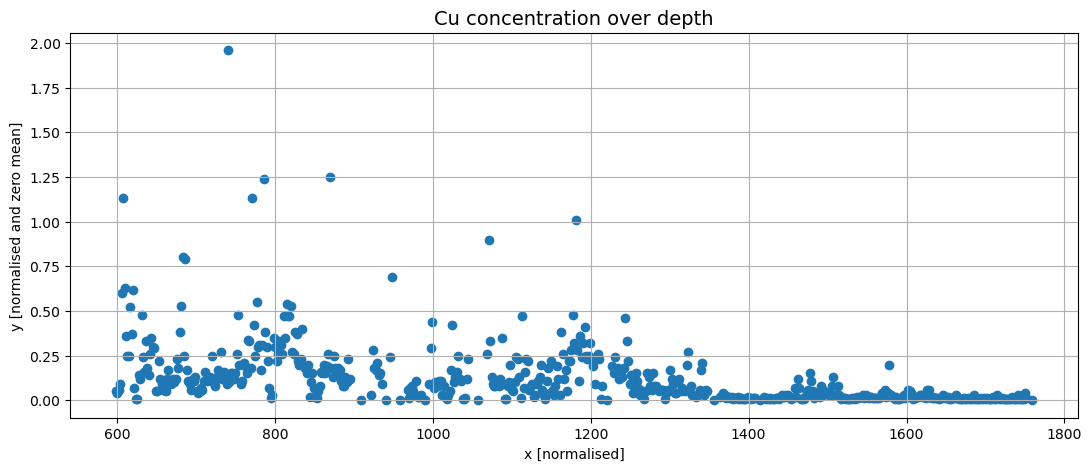

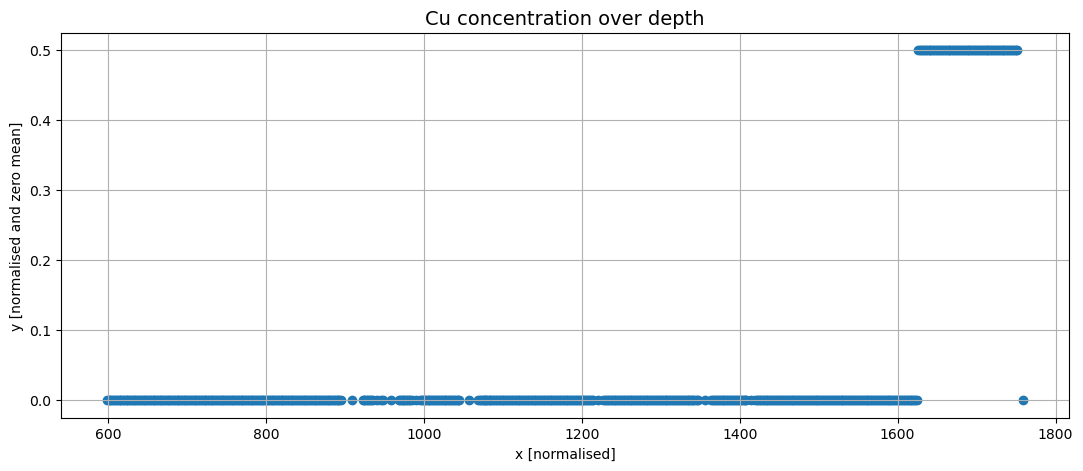

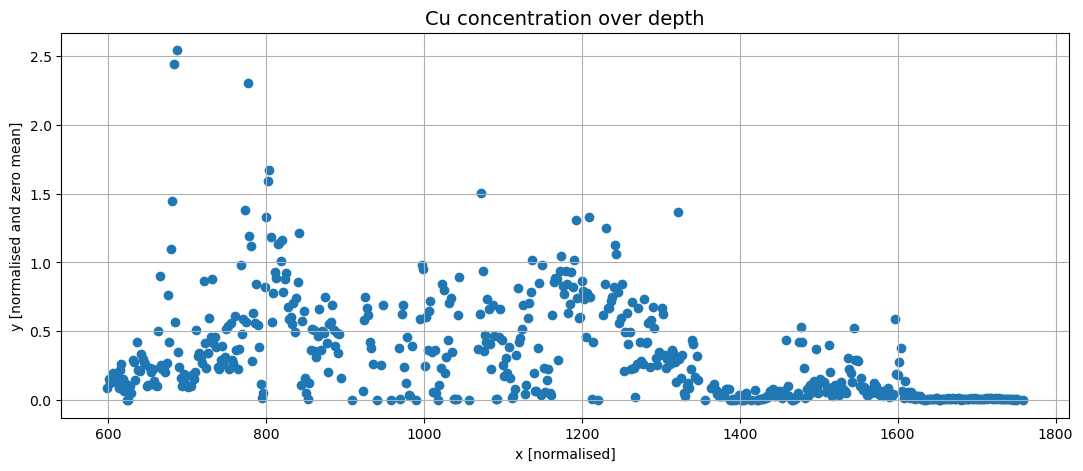

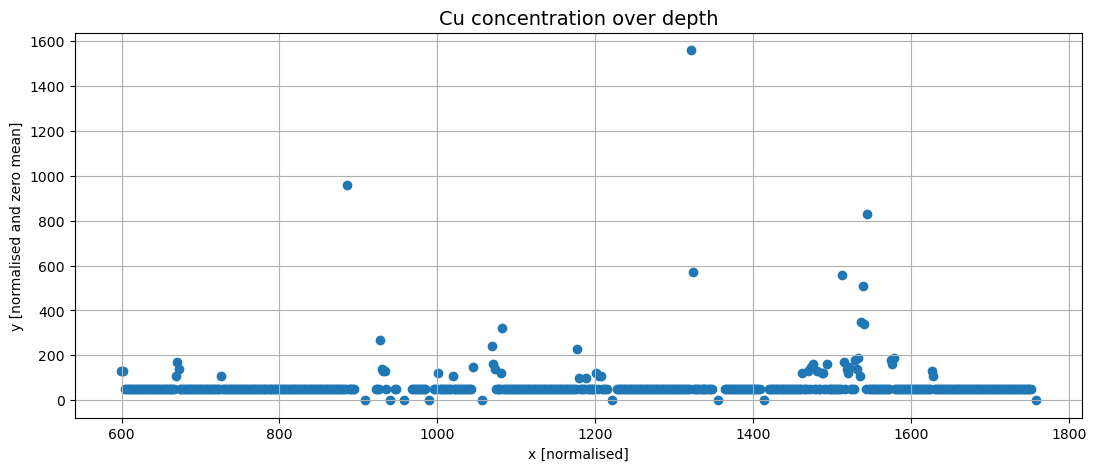

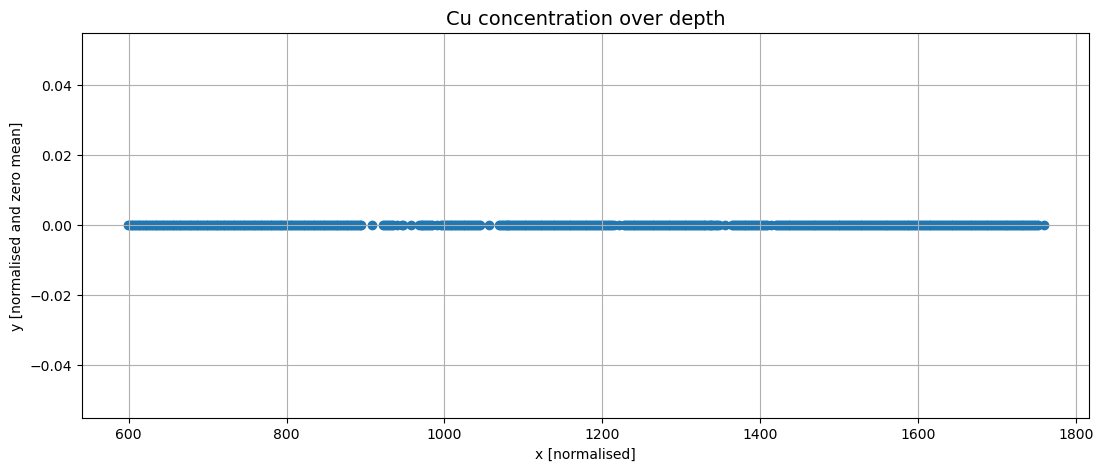

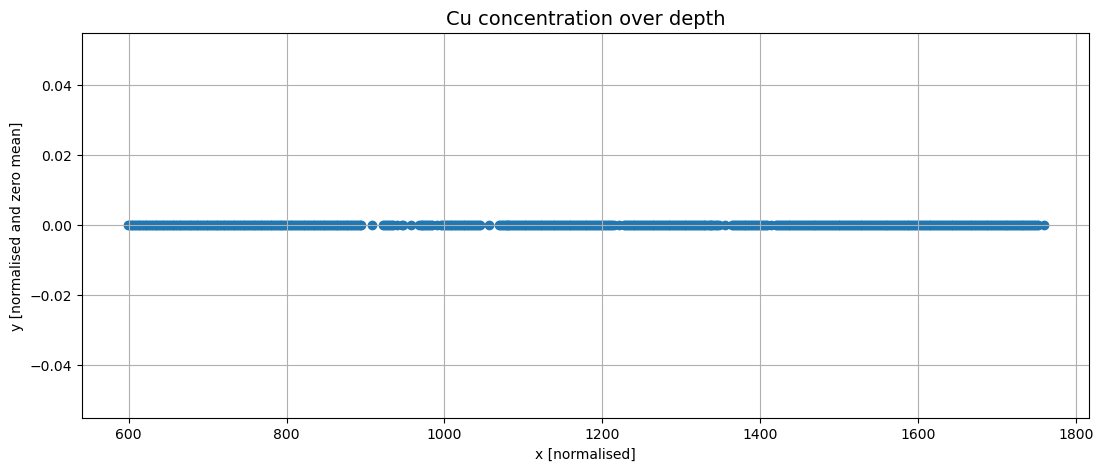

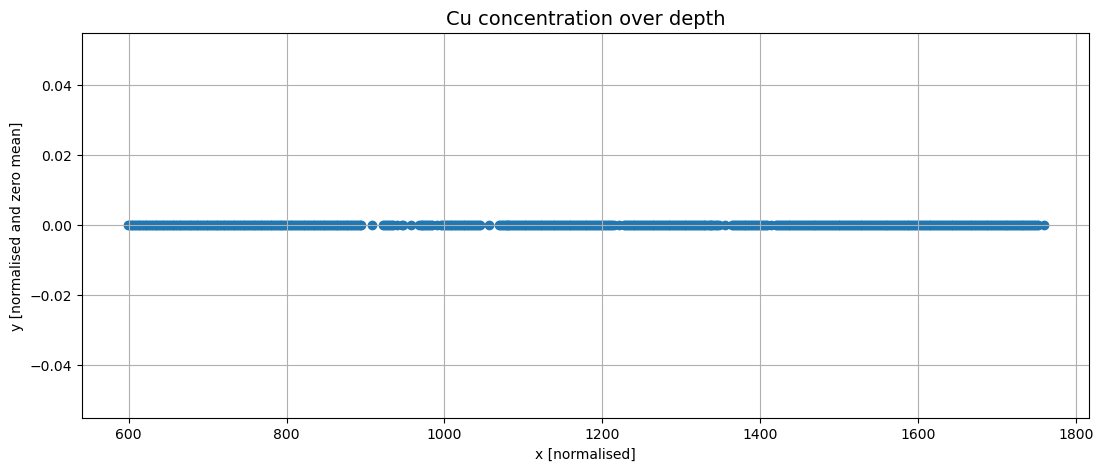

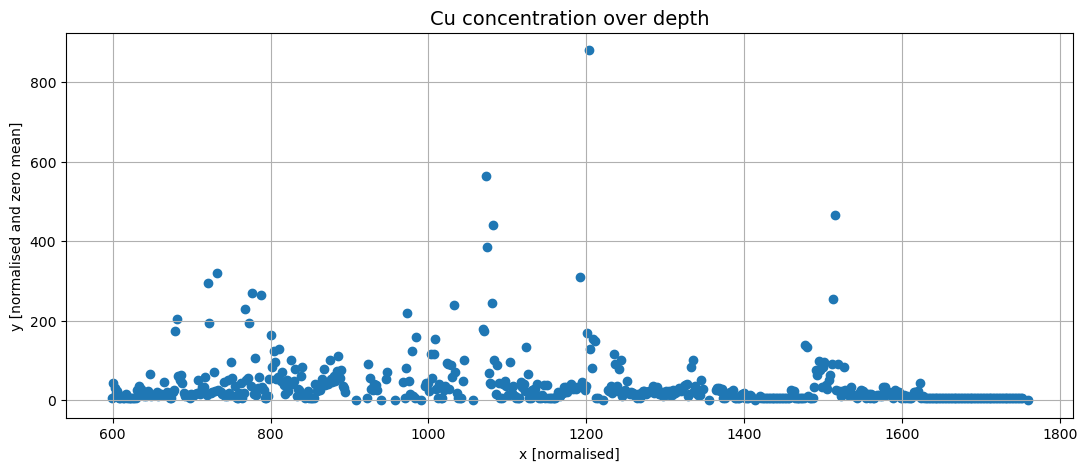

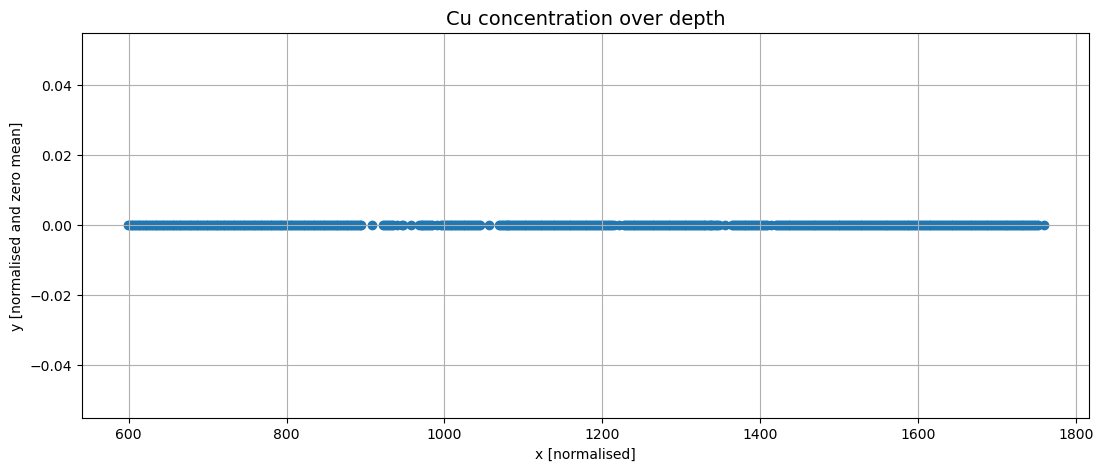

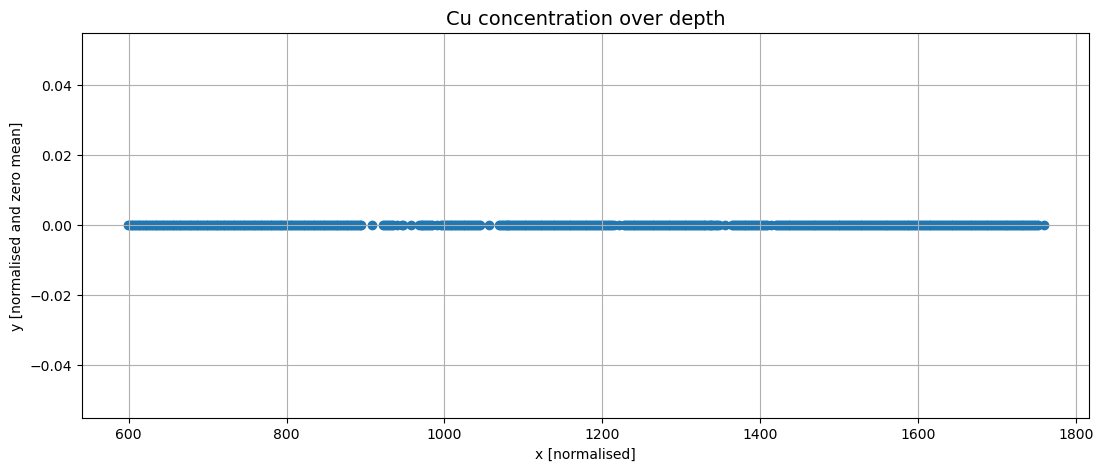

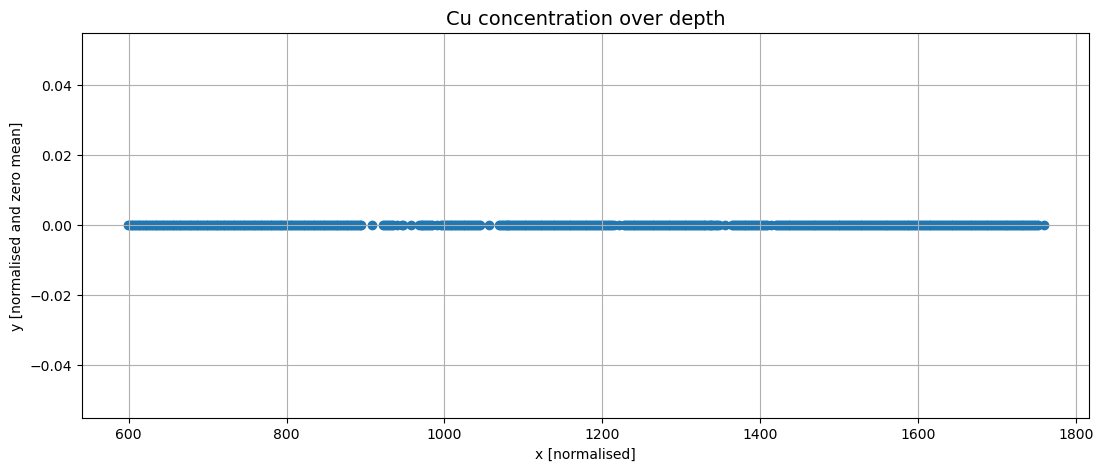

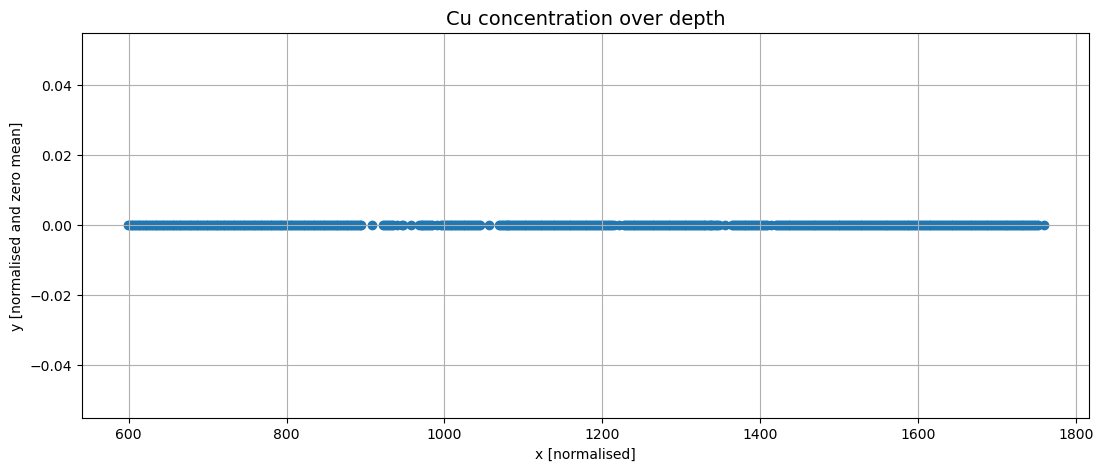

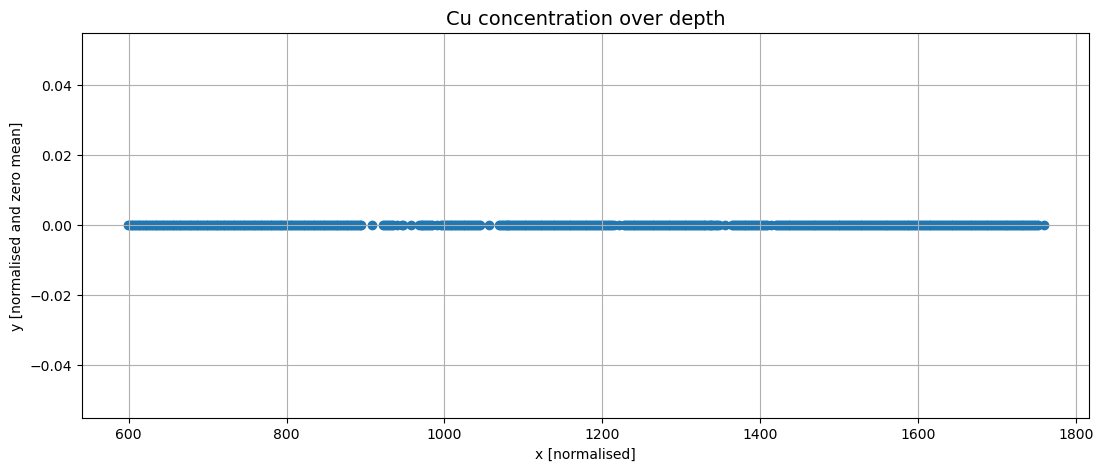

In [367]:
for mineral in ['Au_ppm',
       'Ag_ppm', 'Cu_pct', 'As_ppm', 'C_pct', 'F_ppm', 'Fe_pct', 'Mo_ppm',
       'S_pct', 'Pb_ppm', 'Zn_ppm', 'Cd_ppm', 'Hg_ppm']:

   pl.figure(figsize=(13, 5))
   pl.scatter(adt2['RL_mid_tf'],adt2[mineral])
   #pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
   #                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
   pl.title('Cu concentration over depth', fontsize=14)
   

   #pl.xlim([1500,1800])
   #pl.ylim([0,0.5])

   pl.xlabel('x [normalised]')
   pl.ylabel('y [normalised and zero mean]')
   pl.grid()

In [379]:
adt["MLITHGROUPINGS2"].value_counts()

QMD                 15849
AND_BAD_BIGD_RHY    10878
IGN                  6980
VA                   6267
FLT_HBX_HWS          4287
CLAY                 1068
INTR                  230
Name: MLITHGROUPINGS2, dtype: int64

In [368]:
adt = pd.read_csv("../Warping-tests/engineered_data/assay_desurveyed_transformed_Mlith_domain.csv")
domained = pd.read_csv('../Warping-tests/engineered_data/blockmodel_domained_NN.csv')

In [381]:
mineral = 'Cu_pct'

In [387]:
# subset assay data by domains
adt_FLT_HBX_HWS = adt[adt["MLITHGROUPINGS2"] == "QMD"]
adt_FLT_HBX_HWS_Cu = adt_FLT_HBX_HWS.loc[:,["HOLEID", 'EAST_mid_tf', 'NORTH_mid_tf', 'RL_mid_tf', mineral]]

# NaN values causing trouble
#adt_FLT_HBX_HWS_Cu["Cu_pct"] = adt_FLT_HBX_HWS_Cu["Cu_pct"].fillna(0)
print(adt_FLT_HBX_HWS_Cu[mineral].isna().sum())
adt_FLT_HBX_HWS_Cu

0


,HOLEID,EAST_mid_tf,NORTH_mid_tf,RL_mid_tf,Cu_pct
25,OTD002,-243.230000,-4.720000,1725.980000,0.080
26,OTD002,-243.230000,-4.720000,1723.980000,0.100
27,OTD002,-243.230000,-4.720000,1721.980000,1.360
28,OTD002,-243.230000,-4.720000,1719.980000,0.280
29,OTD002,-243.230000,-4.720000,1717.980000,0.030
...,...,...,...,...,...
45547,UGD057,585.857338,1823.786208,418.545786,1.030
45548,UGD057,585.740563,1825.743063,418.151536,0.705
45549,UGD057,585.622978,1827.699688,417.756292,0.693
45550,UGD057,585.504531,1829.656085,417.360071,0.504


In [371]:
adt_FLT_HBX_HWS_Cu = adt_FLT_HBX_HWS_Cu.dropna(subset=[mineral])

In [382]:
adt_FLT_HBX_HWS_Cu['HOLEID'].value_counts()

OTD1770     442
OTD1769     419
OTD1417     312
OTD572      306
OTD1771     279
           ... 
UGD017        1
OTD1491       1
UGD015        1
OTRC2400      1
UGD021        1
Name: HOLEID, Length: 246, dtype: int64

In [388]:
adt_FLT_HBX_HWS_Cu = adt_FLT_HBX_HWS_Cu.loc[adt_FLT_HBX_HWS_Cu['HOLEID'] == 'OTD1769']
adt_FLT_HBX_HWS_Cu

,HOLEID,EAST_mid_tf,NORTH_mid_tf,RL_mid_tf,Cu_pct
2931,OTD1769,132.660132,1160.371688,975.972265,0.2170
2932,OTD1769,133.452360,1160.420388,974.136417,0.5160
2933,OTD1769,134.244774,1160.469277,972.300658,0.4640
2934,OTD1769,135.037379,1160.518356,970.464987,0.7490
2935,OTD1769,135.830180,1160.567626,968.629409,0.4650
...,...,...,...,...,...
3480,OTD1769,584.414653,1199.344470,-65.253102,0.1130
3481,OTD1769,585.115024,1199.359382,-67.126129,0.0671
3482,OTD1769,585.814877,1199.373777,-68.999350,0.0867
3483,OTD1769,586.514211,1199.387645,-70.872763,0.1730


In [389]:
fig = px.histogram(adt_FLT_HBX_HWS_Cu[mineral], x = mineral,
                  title = "Distribution of raw Cu_pct values")
fig.show()

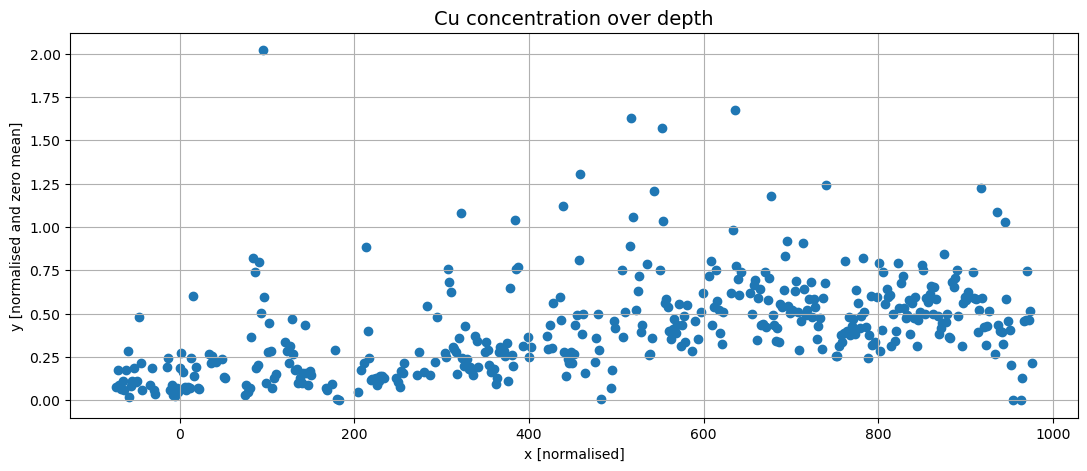

In [390]:
   pl.figure(figsize=(13, 5))
   pl.scatter(adt_FLT_HBX_HWS_Cu['RL_mid_tf'],adt_FLT_HBX_HWS_Cu[mineral])
   #pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
   #                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
   pl.title('Cu concentration over depth', fontsize=14)
   

   #pl.xlim([1500,1800])
   #pl.ylim([0,0.5])

   pl.xlabel('x [normalised]')
   pl.ylabel('y [normalised and zero mean]')
   pl.grid()

In [391]:
x = adt_FLT_HBX_HWS_Cu[['EAST_mid_tf','NORTH_mid_tf', 'RL_mid_tf']].values[:,np.newaxis] #[:,np.newaxis] makes the second dimension explicit
y = adt_FLT_HBX_HWS_Cu[mineral].values[:,np.newaxis] #[:,np.newaxis] makes the second dimension explicit
x = x.reshape(len(adt_FLT_HBX_HWS_Cu),3)

print(f"x has shape ({x.shape[0]},{x.shape[1]}) and has range [{np.min(x):.3f},{np.max(x):.3f}]")
print(f"y has shape ({y.shape[0]},{y.shape[1]}) and has range [{np.min(y):.3f},{np.max(y):.3f}]")

x has shape (419,3) and has range [-72.746,1199.401]
y has shape (419,1) and has range [0.001,2.020]


In [6]:
def calc_moving_avg(dataframe, variable_name_str, window_size = 5, ):
    index_var = int(np.where(adt_FLT_HBX_HWS_Cu.columns == "Cu_pct")[0])
    i = 0
    # List fo all holeids
    holeid_list = np.unique(dataframe["HOLEID"]).reshape(-1)
    # empty container
    moving_avg_list = []
    # Iterate over all holes
    for i in range(holeid_list.shape[0]):
        # Retrieve name of holeid
        holeid = holeid_list[i]
        # Create subset
        dataframe_holeid_subset = dataframe[dataframe["HOLEID"] == holeid]
        # Iterate over all rows in subset
        subset_length = dataframe_holeid_subset.shape[0]
        j = 0
        # end not included
        for j in range(subset_length):
            if (j < ((window_size - 1)/2)):
                ma = np.mean(dataframe_holeid_subset.iloc[0:int(j + ((window_size - 1)/2) + 1), index_var])
                moving_avg_list.append(ma)
                j = j + 1
            elif (j > (subset_length - ((window_size - 1)/2) - 2)):
                ma = np.mean(dataframe_holeid_subset.iloc[j:subset_length, index_var])
                moving_avg_list.append(ma)
                j = j + 1
            else:
                ma = np.mean(dataframe_holeid_subset.iloc[(j-2):(j+3), index_var])
                moving_avg_list.append(ma)
                j = j + 1
        i = i + 1
    return(moving_avg_list)

In [7]:
#moving_average_list = calc_moving_avg(window_size = 5, dataframe = adt_FLT_HBX_HWS_Cu, variable_name_str = "Cu_pct")

#adt_FLT_HBX_HWS_Cu["moving_average_Cu_pct"] = moving_average_list

In [397]:
adt_FLT_HBX_HWS_Cu

,HOLEID,EAST_mid_tf,NORTH_mid_tf,RL_mid_tf,Cu_pct
2931,OTD1769,132.660132,1160.371688,975.972265,0.2170
2932,OTD1769,133.452360,1160.420388,974.136417,0.5160
2933,OTD1769,134.244774,1160.469277,972.300658,0.4640
2934,OTD1769,135.037379,1160.518356,970.464987,0.7490
2935,OTD1769,135.830180,1160.567626,968.629409,0.4650
...,...,...,...,...,...
3480,OTD1769,584.414653,1199.344470,-65.253102,0.1130
3481,OTD1769,585.115024,1199.359382,-67.126129,0.0671
3482,OTD1769,585.814877,1199.373777,-68.999350,0.0867
3483,OTD1769,586.514211,1199.387645,-70.872763,0.1730


In [404]:
x = x[:,2].reshape(-1,1)

Training set contains 293 observations.
Testing set contains 126 observations.


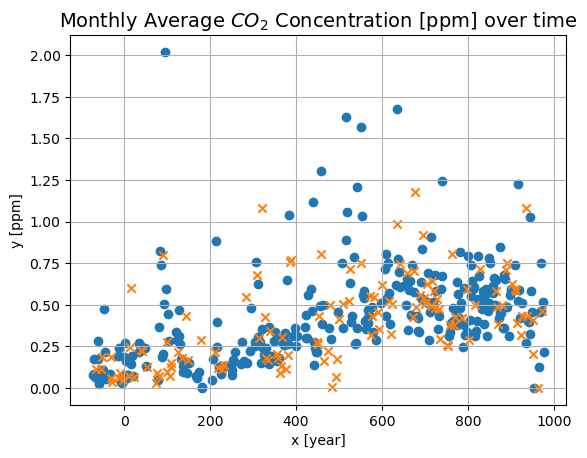

In [410]:
random_indices = np.random.permutation(x.shape[0])
train_ratio = .7
n_train = int(np.floor(x.shape[0]*train_ratio))
n_test = x.shape[0]-n_train
train_idx, test_idx = random_indices[:n_train], random_indices[n_train:]
x_train, x_test = x[train_idx,:], x[test_idx,:]
y_train, y_test = y[train_idx,:], y[test_idx,:]

print(f"Training set contains {y_train.shape[0]} observations.")
print(f"Testing set contains {y_test.shape[0]} observations.")

pl.scatter(x_train, y_train)
pl.scatter(x_test, y_test,marker="x")
pl.title('Monthly Average $CO_2$ Concentration [ppm] over time', fontsize=14)
pl.xlabel('x [year]')
pl.ylabel('y [ppm]')
pl.grid()

In [399]:
holeid_list = np.unique(adt_FLT_HBX_HWS_Cu["HOLEID"]).reshape(-1)
# 150 holdeids for training
# 65 holeids for val
int(holeid_list.shape[0] * 0.7)


np.random.seed(42)

train_index_list = np.random.choice(holeid_list.shape[0], size = int(holeid_list.shape[0] * 0.7), replace = False)
val_index_list = list(set(range(holeid_list.shape[0])).difference(train_index_list))

holeid_list[train_index_list]
holeid_list[val_index_list]

train_subset = adt_FLT_HBX_HWS_Cu[adt_FLT_HBX_HWS_Cu["HOLEID"].isin(holeid_list[train_index_list])]
val_subset = adt_FLT_HBX_HWS_Cu[adt_FLT_HBX_HWS_Cu["HOLEID"].isin(holeid_list[val_index_list])]

KeyError: "None of [Int64Index([203, 278, 172, 368, 352,  73, 204, 253,  30,  72,\n            ...\n            221,  95,  51, 240, 367, 321, 178,  41, 327, 206],\n           dtype='int64', length=293)] are in the [index]"

In [393]:
# training data: torch.tensor format. Division my 1000 to have input and output dimensions similar
train_x = np.array(train_subset.loc[:,['EAST_mid_tf', 'NORTH_mid_tf', 'RL_mid_tf']])
# y expected to be scalar
#train_y = np.array(train_subset.loc[:,['bc_ma_Cu_pct']])
train_y = np.array(train_subset.loc[:,[mineral]])*100

# Validation data: torch.tensor format 
val_x = np.array(val_subset.loc[:,['EAST_mid_tf', 'NORTH_mid_tf', 'RL_mid_tf']])
# y expected to be scalar
#val_y = np.array(val_subset.loc[:,['bc_ma_Cu_pct']])
val_y = np.array(val_subset.loc[:,[mineral]])*100

# MA: moving average (not transformed)

print(train_x.shape)
print(train_y.shape)

(0, 3)
(0, 1)


In [10]:
def transform_to_tanh(y, a, b, c):
    """
    Transforms a given variable to its hyperbolic tangent as a weighted sum.

    Args:
        t: A scalar or tensor to be transformed.
        a: A 1D numpy array of length I containing the weights for each element in the sum.
        b: A 1D numpy array of length I containing the scaling factors for each element in the sum.
        c: A 1D numpy array of length I containing the offsets for each element in the sum.

    Returns:
        The hyperbolic tangent of y.
    """
    # Compute the weighted sum of hyperbolic tangents
    f = np.sum(a * np.tanh(b * (y + c)))
    
    return f

In [11]:
def derivative_tanh(y, a, b, c):
    """
    Computes the derivative of a given function with respect to t.

    Args:
        t: A scalar or tensor with respect to which to take the derivative.
        a: A 1D numpy array of length I containing the weights for each element in f.
        b: A 1D numpy array of length I containing the scaling factors for each element in f.
        c: A 1D numpy array of length I containing the offsets for each element in f.

    Returns:
        The derivative of f with respect to t.
    """
    # Compute the derivative of f with respect to t using the chain rule
    df_dy = np.sum(a * b * (1 - np.tanh(b * (y + c)) ** 2))
    
    return df_dy

In [272]:
train_x_depth = train_x[:,2].reshape(-1,1)

In [273]:
val_x_depth = val_x[:,2].reshape(-1,1)

In [673]:
signal_variance = 1 #0.15
lengthscale = 1000 #50000
sigma_n = 1 #0.1
gp = GPR("Matern", x_train, y_train, [signal_variance,lengthscale], sigma_n, nu=5/2)
[f_mean_2,f_std_2] = gp.predict(x_test)
lml = gp.log_marginal_likelihood()

Log Marginal Likelihood: [[-284.13011232]]
0.42303485637596133 41.76140095465394
0.5529677018361443 202.0


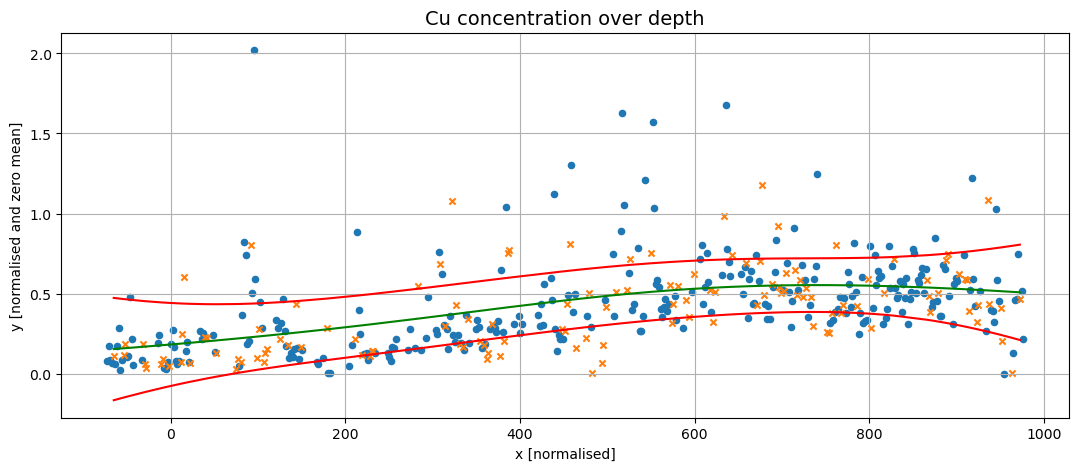

In [674]:

print("Log Marginal Likelihood: "+str(lml))
print(np.mean(f_mean_2), np.mean(val_y))
print(np.max(f_mean_2), np.max(val_y))

pl.figure(figsize=(13, 5))
pl.scatter(x_train, y_train, s=20)
pl.scatter(x_test, y_test,marker="x", s=20)
#pl.fill_between(val_x.ravel(), (f_mean_opt-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
sns.lineplot(x=x_test.reshape(-1), y=f_mean_2.reshape(-1),color ='g')

sns.lineplot(x=x_test.reshape(-1), y=(f_mean_2-2*f_std_2).reshape(-1),color ='r')
sns.lineplot(x=x_test.reshape(-1), y=(f_mean_2+2*f_std_2).reshape(-1),color ='r')


#sns.lineplot(x=x_test.reshape(-1), y=f_mean_2.reshape(-1),color ='g')
pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([1500,1800])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()


In [675]:
#gp = GPR("Matern", train_x_depth, train_y, [signal_variance,lengthscale], sigma_n, nu=5/2)
gp.fit()
gp.log_marginal_likelihood(), gp.optimal_params
[f_mean_opt,f_std_opt] = gp.predict(x_test)
lml_opt = gp.log_marginal_likelihood()

[1000.][[284.13011232]]
[1412.53754462][[283.64178116]]
[1995.26231497][[283.36192255]]
[2818.38293126][[283.24301656]]
[5623.4132519][[283.41621625]]
[3981.07170553][[283.26143314]]
[1995.26231497][[283.36192255]]
[3349.65439158][[283.2348972]]
[3981.07170553][[283.26143314]]
[3072.55736527][[283.23469476]]
[2818.38293126][[283.24301656]]
[3208.11553282][[283.23372109]]
[3349.65439158][[283.2348972]]
[3139.60491288][[283.23394046]]
[3278.12115139][[283.23403917]]
[3173.67535957][[283.23376375]]
[3242.92944485][[283.23381279]]
[3190.84898063][[283.23372565]]
[3225.47551903][[283.23375013]]
[3199.47060897][[283.23371917]]
[3190.84898063][[283.23372565]]
[3203.79015503][[283.23371908]]
[3208.11553282][[283.23372109]]
[3201.62965352][[283.23371887]]
[3199.47060897][[283.23371917]]
[3202.70972209][[283.23371891]]
[3200.54994919][[283.23371896]]
[3202.16964227][[283.23371887]]
[3201.08975583][[283.23371889]]
[3201.89963651][[283.23371887]]
[3202.16964227][[283.23371887]]
[3201.76464217][[28

Log Marginal Likelihood: [[-283.23371887]]
0.4220495801062642 0.39302293650793646
0.5754445854337719 1.18


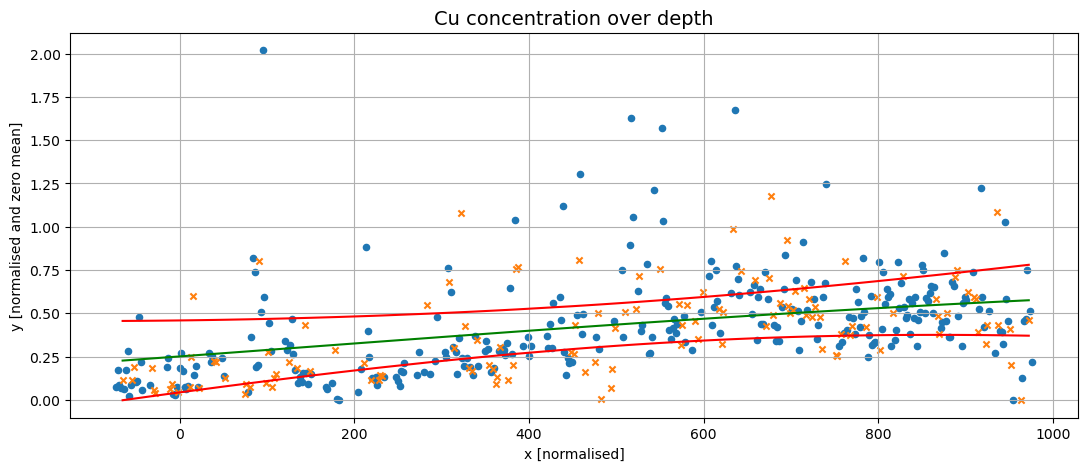

In [676]:

print("Log Marginal Likelihood: "+str(lml_opt))
print(np.mean(f_mean_opt), np.mean(y_test))
print(np.max(f_mean_opt), np.max(y_test))

pl.figure(figsize=(13, 5))
pl.scatter(x_train, y_train, s=20)
pl.scatter(x_test, y_test,marker="x", s=20)
#pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
sns.lineplot(x=x_test.reshape(-1), y=(f_mean_opt-2*f_std_opt).reshape(-1),color ='r')
sns.lineplot(x=x_test.reshape(-1), y=(f_mean_opt+2*f_std_opt).reshape(-1),color ='r')

sns.lineplot(x=x_test.reshape(-1), y=f_mean_opt.reshape(-1),color ='g')
pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([1500,1800])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()

In [677]:
I = 1
val_a = 5
val_b = 1
val_c = 0.01
a = np.full(I, val_a)
b = np.full(I, val_b)
c = np.full(I, val_c)

signal_variance = 1 #0.15
lengthscale = 1000 #50000
sigma_n = 1 #0.1
gpw = GPR("Matern", x_train, y_train, [signal_variance,lengthscale], sigma_n, [a,b,c], nu=5/2)

Log Marginal Likelihood: [[28.95994585]]
0.42303485637596133 0.39302293650793646
0.5529677018361443 1.18


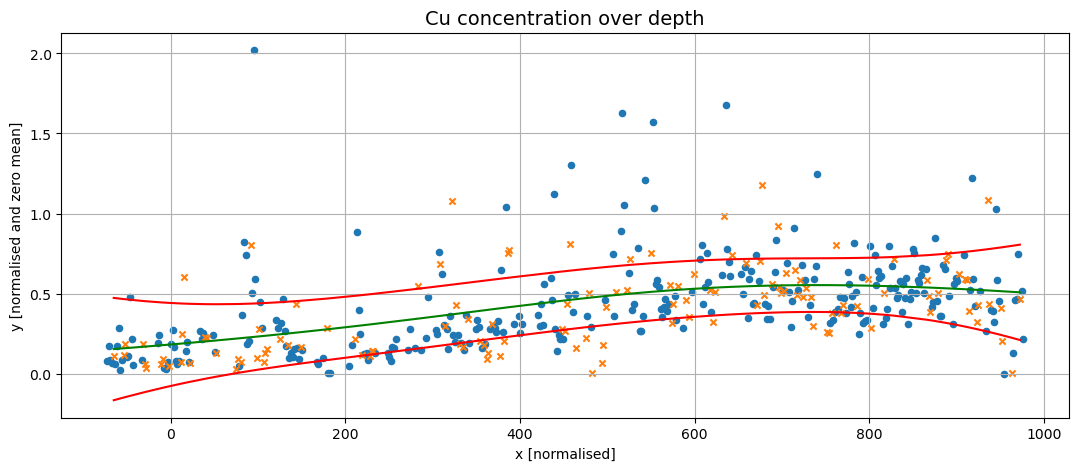

In [678]:
[fw_mean_2,fw_std_2] = gpw.predict_original(x_test)
lmlw = gpw.log_marginal_likelihood()
print("Log Marginal Likelihood: "+str(lmlw))
print(np.mean(fw_mean_2), np.mean(y_test))
print(np.max(fw_mean_2), np.max(y_test))
pl.figure(figsize=(13, 5))
pl.scatter(x_train, y_train, s=20)
pl.scatter(x_test, y_test,marker="x", s=20)
#pl.fill_between(x_test.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
#pl.plot(x_test, f_mean_2,'g')
sns.lineplot(x=x_test.reshape(-1), y=fw_mean_2.reshape(-1),color='green')

sns.lineplot(x=x_test.reshape(-1), y=(fw_mean_2-2*fw_std_2).reshape(-1),color ='r')
sns.lineplot(x=x_test.reshape(-1), y=(fw_mean_2+2*fw_std_2).reshape(-1),color ='r')

pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([1500,1800])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()
fw_norm_train = 0
fw_norm_test = 0
for i in range(I):
    fw_norm_train += a[i]* np.tanh(b[i] * (train_y + c[i])) 
    fw_norm_test += a[i] * np.tanh(b[i] * (val_y + c[i])) 

In [679]:
gpw.fit()

[fw_mean_opt,fw_std_opt] = gpw.predict_original(x_test)
lmlw_opt = gpw.log_marginal_likelihood()
a = [gpw.optimal_params[1]]
b = [gpw.optimal_params[2]]
c = [gpw.optimal_params[3]]
print(gpw.optimal_params)


c:\Users\23478671\Github\Warped-GPs-\GPR.py:128: OptimizeWarning:

Unknown solver options: xatol



[1.e+03 5.e+00 1.e+00 1.e-02][[-28.95994585]]
[1.e+03 5.e+00 1.e+00 1.e-02][[-28.95994585]]
[2.71828183e+03 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-19.78663216]]
[1.98288151e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-29.08112432]]
[4.40523276e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-30.88888129]]
[4.40523276e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-30.88888129]]
[6.02504993e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-30.71997335]]
[3.24752053e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-30.68292639]]
[4.49136101e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-30.88984684]]
[4.52745544e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-30.88989342]]
[4.56347466e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-30.88973486]]
[4.52745544e+02 5.00000000e+00 1.00000000e+00 1.00000000e-02][[-30.88989342]]
[4.52745544e+02 1.35914091e+01 1.00000000e+00 1.00000000e-02][[260.43581408]]
[4.52745544e+02 9.91440753e-01 1.00000000e+00 1.00

Log Marginal Likelihood: [[55.83022147]]
0.428102795226168 0.39302293650793646
0.608106457108329 1.18


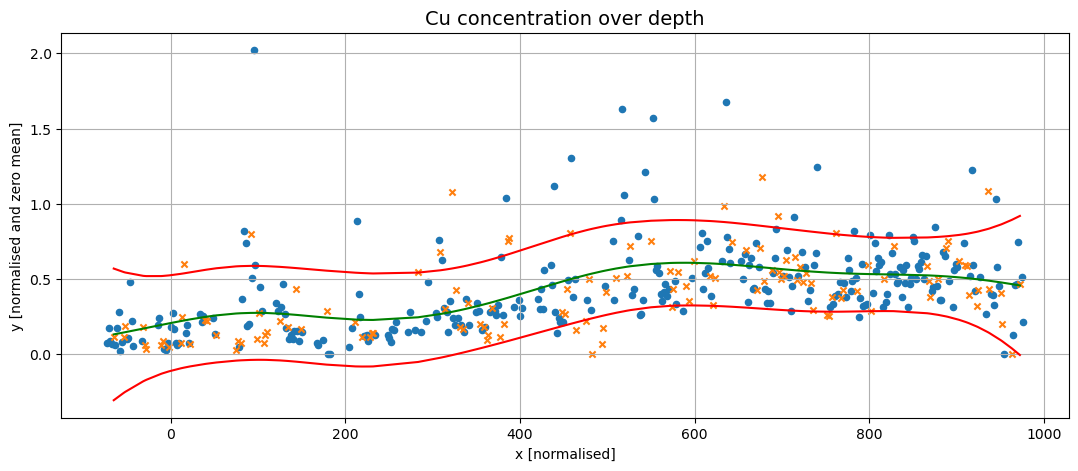

In [680]:
import seaborn as sns

fw_norm_train = 0
fw_norm_test = 0
for i in range(I):
    fw_norm_train += a[i]* np.tanh(b[i] * (y_train + c[i])) 
    fw_norm_test += a[i] * np.tanh(b[i] * (y_test + c[i])) 

print("Log Marginal Likelihood: "+str(lmlw_opt))
print(np.mean(fw_mean_opt), np.mean(y_test))
print(np.max(fw_mean_opt), np.max(y_test))

pl.figure(figsize=(13, 5))
sns.lineplot(x=x_test.reshape(-1), y=fw_mean_opt.reshape(-1),color='green')

sns.lineplot(x=x_test.reshape(-1), y=(fw_mean_opt-2*fw_std_opt).reshape(-1),color ='r')
sns.lineplot(x=x_test.reshape(-1), y=(fw_mean_opt+2*fw_std_opt).reshape(-1),color ='r')
#pl.scatter(x_train, fw_norm_train)
#pl.scatter(x_test, fw_norm_test,marker="x")
pl.scatter(x_train, y_train, s=20)
pl.scatter(x_test, y_test,marker="x", s=20)
#pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_opt+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([0,200])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()


In [665]:
[f_mean,f_std] = gp.predict(x_test)
[fw_mean,fw_std] = gpw.predict_original(x_test)

In [669]:
mae = np.mean(np.abs(f_mean - y_test))
mae2 = np.mean(np.abs(fw_mean - y_test))

print("GP MAE:","%.3f" % mae )
print("GP warp MAE:", "%.3f" % mae2 )

GP MAE: 0.179
GP warp MAE: 0.163


In [671]:
mape = np.mean(np.abs((f_mean - y_test)/y_test))*100
mape2 = np.mean(np.abs((fw_mean - y_test)/y_test))*100

print("GP MAPE:", "%.1f" % mape,'%' )
print("GP warp MAPE:","%.1f" % mape2,'%')

GP MAPE: 436.8 %
GP warp MAPE: 395.1 %


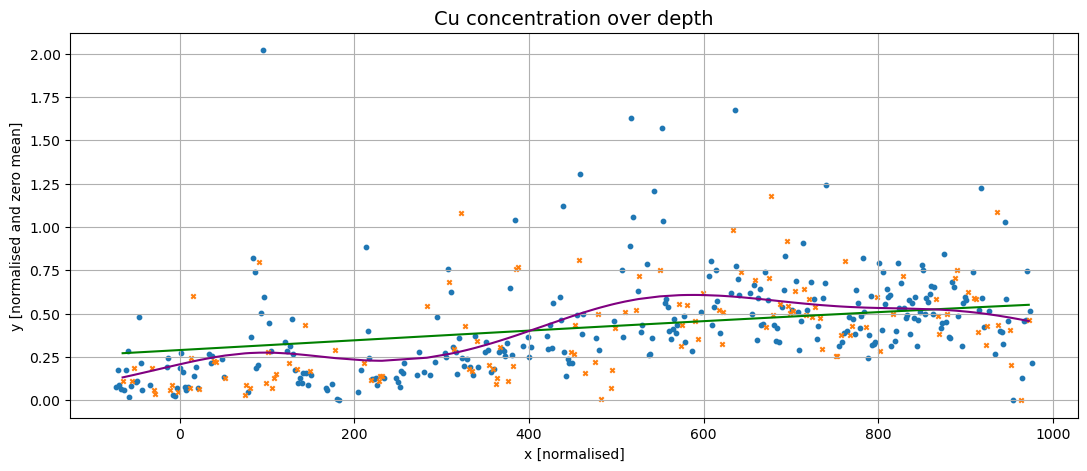

In [672]:
pl.figure(figsize=(13, 5))
pl.scatter(x_train, y_train, s=10)
pl.scatter(x_test, y_test,marker="x", s=10)
#pl.fill_between(val_x.ravel(), (f_mean_2-2*f_std_2).ravel(), (f_mean_2+2*f_std_2).ravel(), \
#                facecolor='blue', interpolate=True, alpha=0.1, label='±2*sigma of prediction')
sns.lineplot(x=x_test.reshape(-1), y=f_mean.reshape(-1),color ='g')
sns.lineplot(x=x_test.reshape(-1), y=fw_mean.reshape(-1),color ='purple')

pl.title('Cu concentration over depth', fontsize=14)

#pl.xlim([1500,1800])
#pl.ylim([0,9])
pl.xlabel('x [normalised]')
pl.ylabel('y [normalised and zero mean]')
pl.grid()